In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json from your system

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jammishetty","key":"8a4cf8d93602640bc0ad7248decef665"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle\ \(1\).json ~/.kaggle/kaggle.json  # Rename and move
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download sartajbhuvaji/brain-tumor-classification-mri --force

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 86% 75.0M/86.8M [00:00<00:00, 781MB/s]
100% 86.8M/86.8M [00:00<00:00, 790MB/s]


In [ ]:
import zipfile

dataset_zip = "/content/brain-tumor-classification-mri.zip"  # Adjust filename if needed
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("brain_tumor_dataset_mri")  # Extract into a folder

In [ ]:
# Define paths
import os
data_dir = "/content/brain_tumor_dataset_mri"
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Testing")

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(train_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(test_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.2950 - loss: 3.9657 - val_accuracy: 0.4694 - val_loss: 1.2522
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.4922 - loss: 1.2059 - val_accuracy: 0.5102 - val_loss: 1.0931
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.5799 - loss: 0.9906 - val_accuracy: 0.5952 - val_loss: 0.9427
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.6318 - loss: 0.8491 - val_accuracy: 0.6531 - val_loss: 0.8600
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.6835 - loss: 0.7572 - val_accuracy: 0.6973 - val_loss: 0.7161
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7187 - loss: 0.6624 - val_accuracy: 0.7007 - val_loss: 0.7046
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7549 - loss: 0.5668 - val_accuracy: 0.7483 - val_loss: 0.6340
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8108 - loss: 0.4816 - val_accuracy: 0.809

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

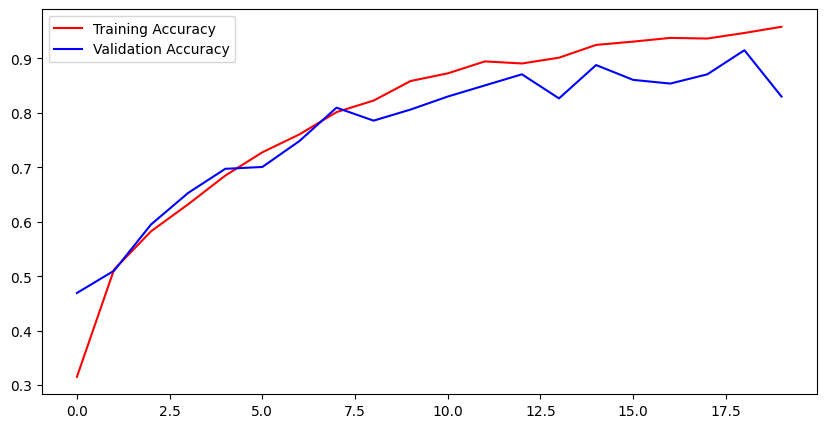

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

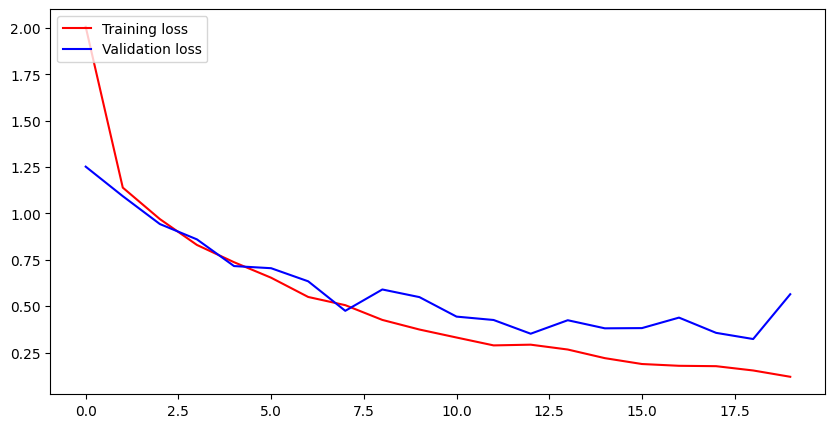

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step
Classification Report:

                  precision    recall  f1-score   support

    glioma_tumor       0.69      0.87      0.77        93
meningioma_tumor       0.93      0.57      0.71        95
        no_tumor       0.86      0.81      0.83        52
 pituitary_tumor       0.84      1.00      0.92        87

        accuracy                           0.81       327
       macro avg       0.83      0.81      0.81       327
    weighted avg       0.83      0.81      0.80       327



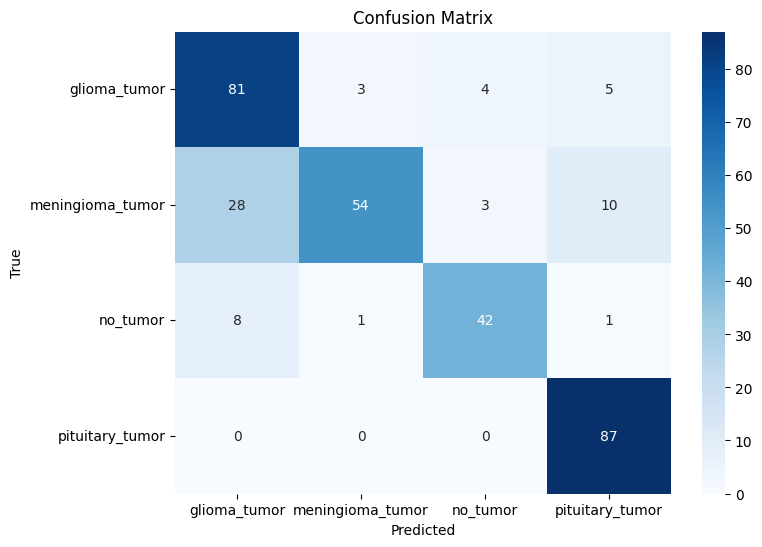

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Accuracy per class
correct = cm.diagonal()
total = cm.sum(axis=1)

# Compare 'no_tumor' vs 'glioma_tumor'
success = [correct[2], correct[0]]  # no_tumor, glioma_tumor
nobs = [total[2], total[0]]

z_stat, p_val = proportions_ztest(success, nobs)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Result is statistically significant: reject null hypothesis")
else:
    print("Result is not statistically significant: fail to reject null hypothesis")


Z-statistic: -1.019
P-value: 0.308
Result is not statistically significant: fail to reject null hypothesis


In [ ]:
from scipy.stats import ttest_ind

# Extract prediction confidences for the two classes
no_tumor_conf = y_pred_probs[:, 2]  # index 2 for 'no_tumor'
glioma_conf = y_pred_probs[:, 0]   # index 0 for 'glioma_tumor'

t_stat, t_p_val = ttest_ind(no_tumor_conf, glioma_conf)
print(f"\nt-Test on prediction confidences:")
print(f"T-statistic: {t_stat:.3f}, P-value: {t_p_val:.3f}")
if t_p_val < 0.05:
    print("Statistically significant difference in mean confidence.")
else:
    print("No significant difference in mean confidence.")



t-Test on prediction confidences:
T-statistic: -6.861, P-value: 0.000
Statistically significant difference in mean confidence.
